In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [83]:
data=pd.read_csv("D:\Excel R\Assignments\Assignment 14\Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [85]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


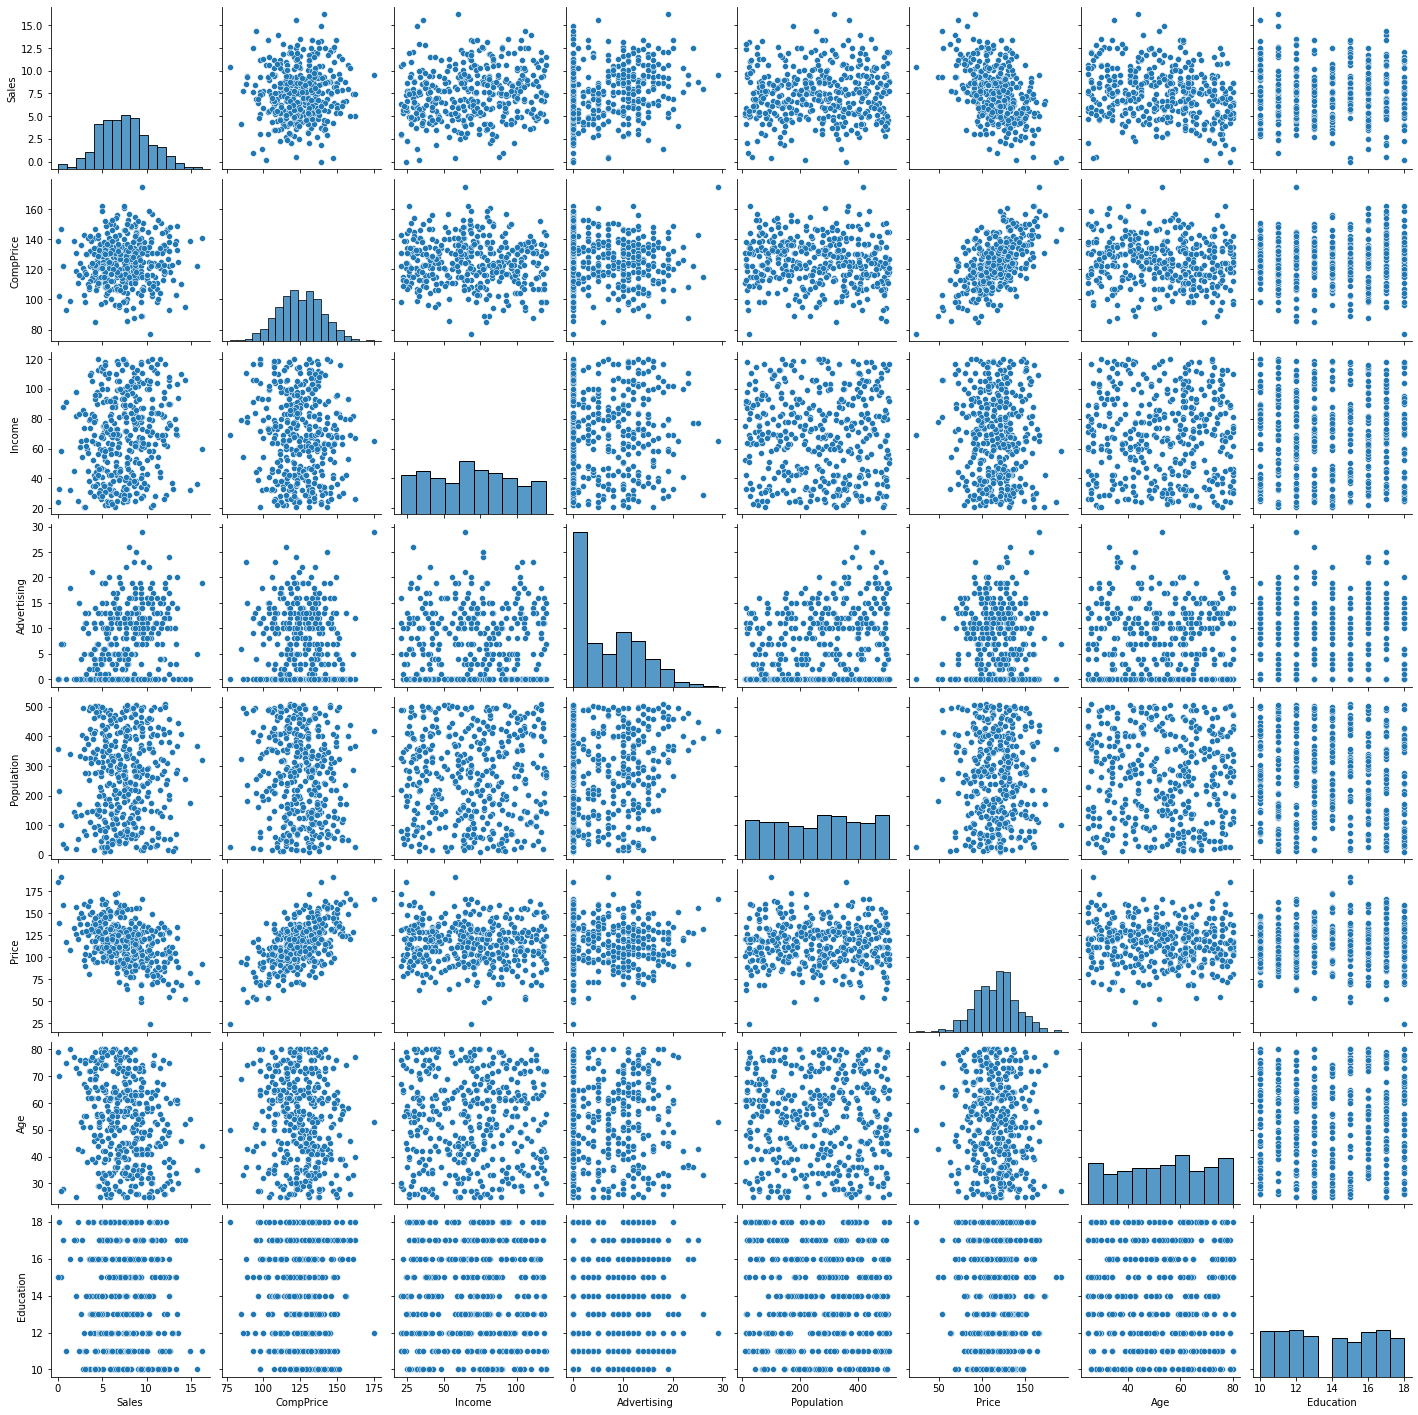

In [86]:
sns.pairplot(data)

In [87]:
rvn=pd.cut(data['Sales'],bins=[0,5.75,11.25,16.5],labels=['Low','Moderate','High'])

In [94]:
data['status']=rvn
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,status
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Moderate
1,111,48,16,260,83,Good,65,10,Yes,Yes,Moderate
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Moderate
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Moderate
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Moderate
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Moderate
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Moderate


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CompPrice    400 non-null    int64   
 1   Income       400 non-null    int64   
 2   Advertising  400 non-null    int64   
 3   Population   400 non-null    int64   
 4   Price        400 non-null    int64   
 5   ShelveLoc    400 non-null    object  
 6   Age          400 non-null    int64   
 7   Education    400 non-null    int64   
 8   Urban        400 non-null    object  
 9   US           400 non-null    object  
 10  status       399 non-null    category
dtypes: category(1), int64(7), object(3)
memory usage: 31.9+ KB


In [97]:
data.status.isna().sum()

1

In [99]:
data[data.isna().any(axis=1)].head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,status
174,139,24,0,358,185,Medium,79,15,No,No,NaN


In [102]:
md='Moderate'
data['status']=data['status'].fillna(md)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,status
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Moderate
1,111,48,16,260,83,Good,65,10,Yes,Yes,Moderate
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Moderate
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Moderate
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Moderate
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Moderate
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Moderate


In [104]:
obj=['ShelveLoc','Urban','US']
data[obj]=data[obj].astype('category')

In [106]:
### Encoding the categorical variable:-
obj1=['ShelveLoc','Urban','US','status']
data[obj1]=data[obj1].apply(LabelEncoder().fit_transform)
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,status
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,2
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,2
397,162,26,12,368,159,2,40,18,1,1,2
398,100,79,7,284,95,0,50,12,1,1,2


In [108]:
data.status.value_counts()

2    241
1    116
0     43
Name: status, dtype: int64

In [110]:
x=data.iloc[:,0:10]
y=data.iloc[:,10]

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Creation of the algorithm to see where to prune decision tree:- 

In [114]:
acc=[]
for i in range(1,15):
    dt=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dt.fit(x_train,y_train)
    train_acc=np.mean(y_train==dt.predict(x_train))
    test_acc=np.mean(y_test==dt.predict(x_test))
    acc.append([train_acc,test_acc])

In [115]:
accuracy=pd.DataFrame(acc,columns=['Train Accuracy','Test Accuracy'])
accuracy['depth']=np.arange(1,15)
accuracy

,Train Accuracy,Test Accuracy,depth
0,0.665625,0.5375,1
1,0.696875,0.6125,2
2,0.700000,0.6125,3
3,0.728125,0.6250,4
4,0.815625,0.6000,5
5,0.896875,0.5875,6
6,0.943750,0.6125,7
7,0.971875,0.6000,8
8,0.984375,0.6125,9
9,0.993750,0.5875,10


## Building Decision Tree Classifier:-

In [116]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [117]:
model.get_n_leaves()

14

In [118]:
predictions=model.predict(x_test)
predictions

array([2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0], dtype=int64)

In [119]:
pd.crosstab(y_test,predictions)

col_0,0,1,2
status,,,
0,3,0,7
1,0,6,15
2,1,7,41


In [120]:
### Accuracy:-
np.mean(predictions==y_test)

0.625

In [121]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.30      0.75      0.43         4
           1       0.29      0.46      0.35        13
           2       0.84      0.65      0.73        63

    accuracy                           0.62        80
   macro avg       0.47      0.62      0.50        80
weighted avg       0.72      0.62      0.66        80



## Graphical Representation:-

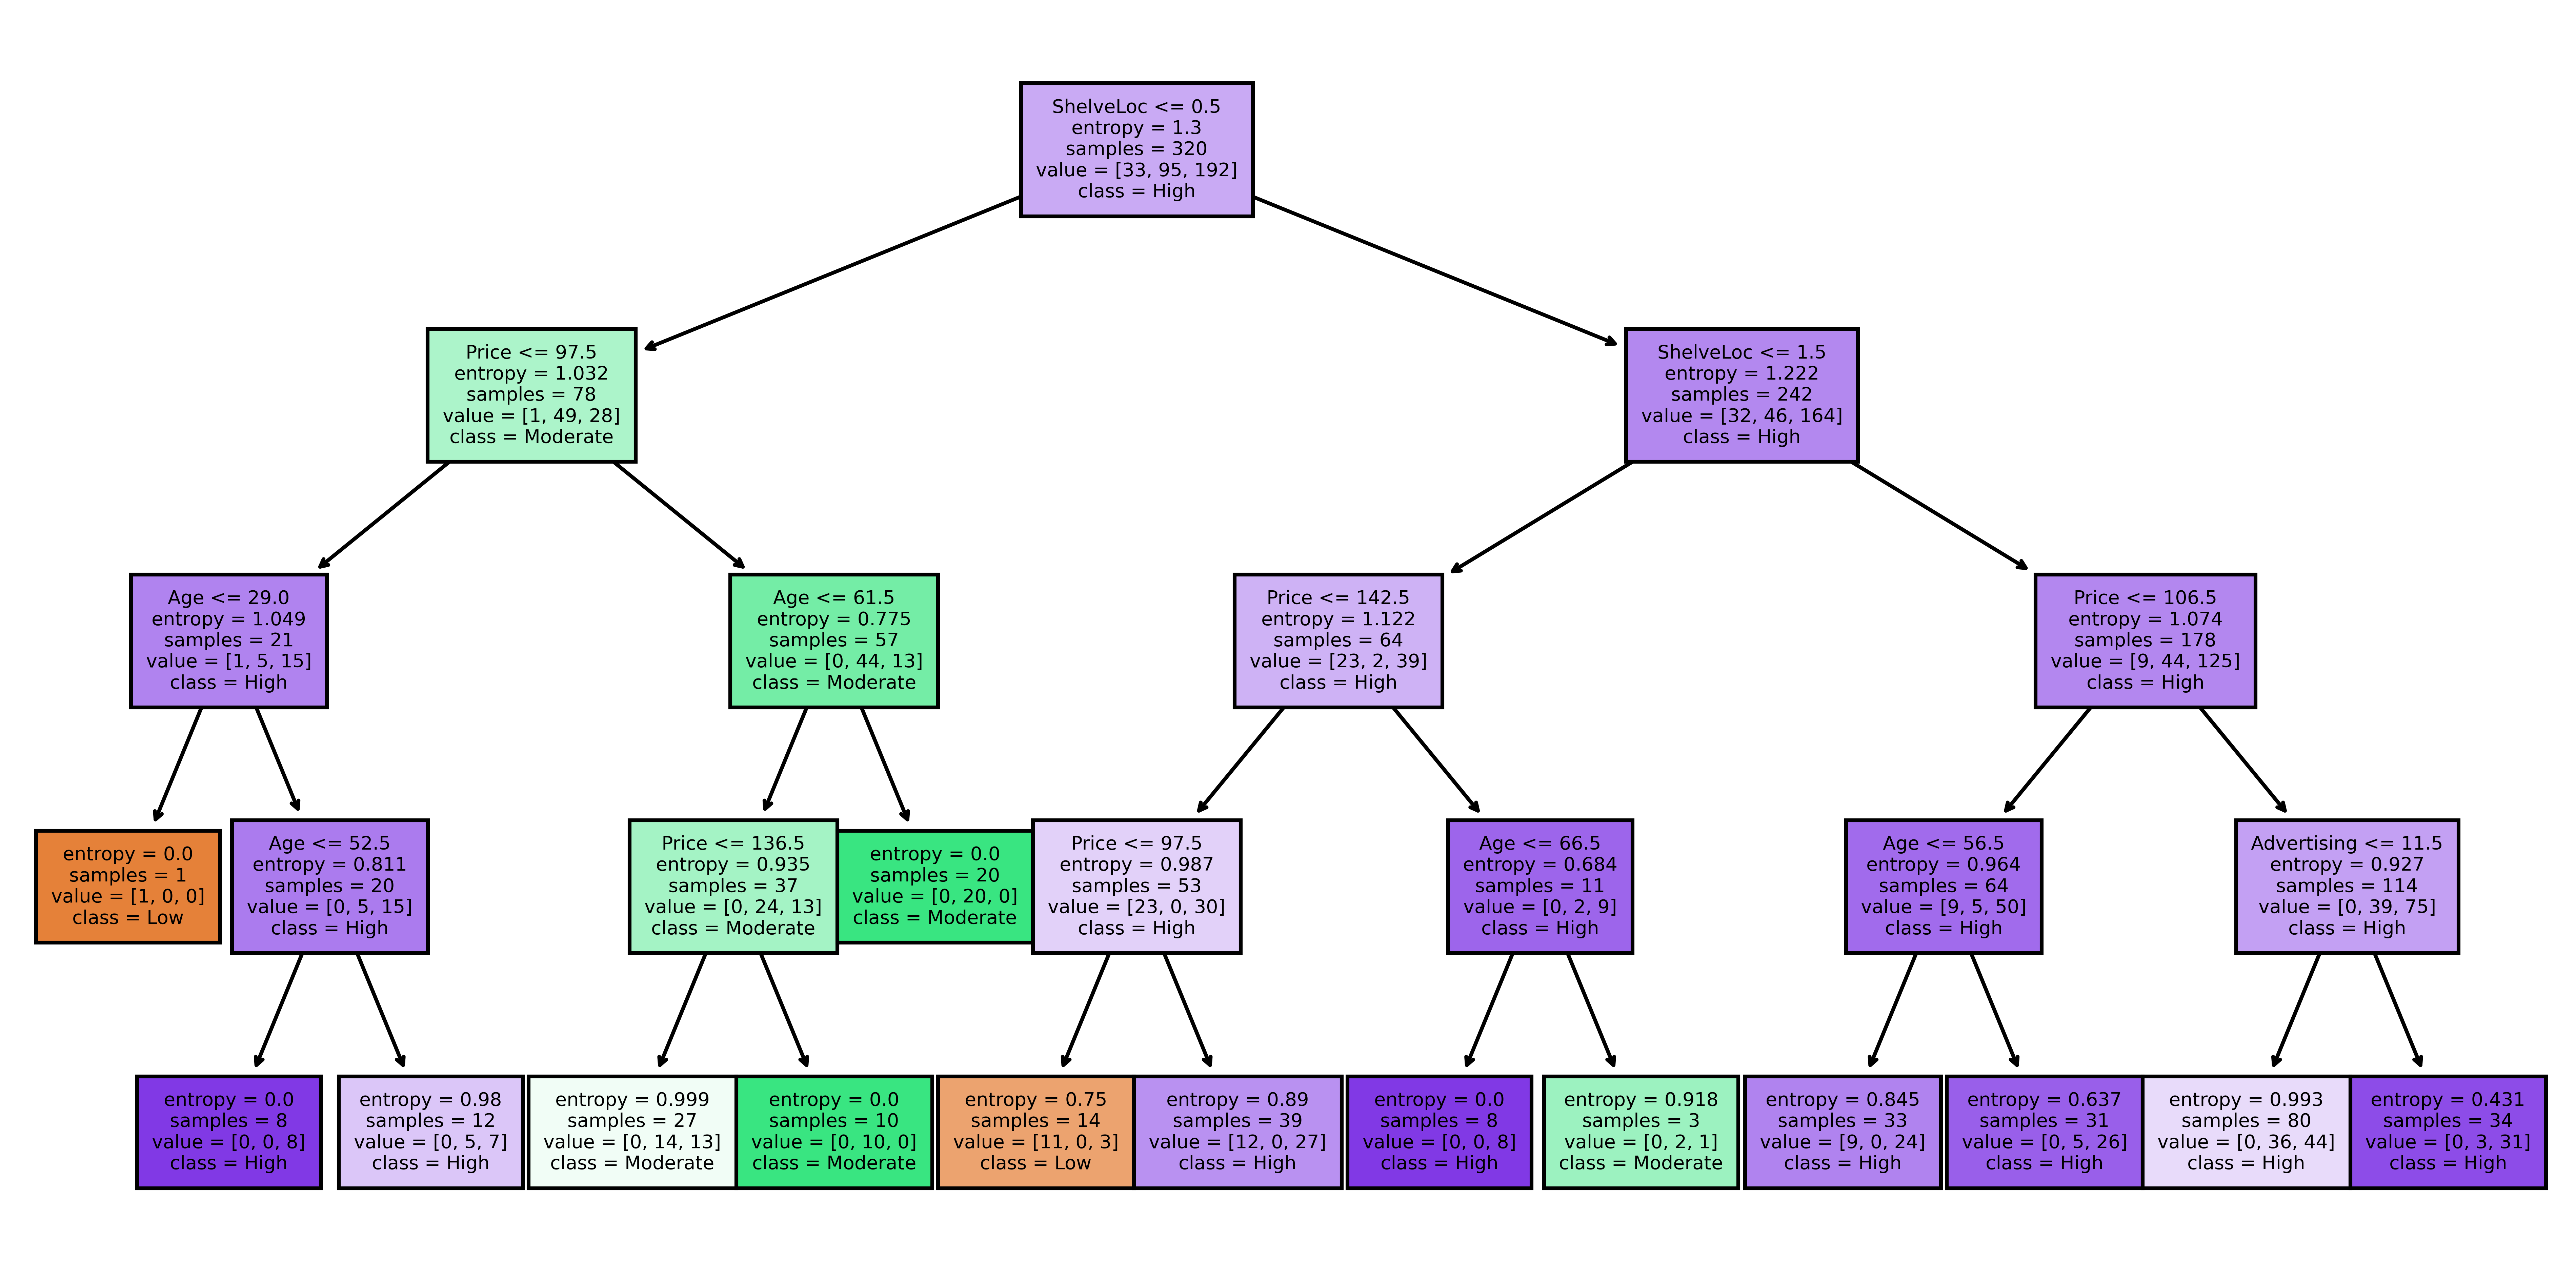

In [123]:
fn=['OMP.Price','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low','Moderate','High']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(12,6),dpi=800)
tree.plot_tree(model,
              feature_names=fn,
              class_names=cn,
              fontsize=5,
              filled=True);